In [46]:
import pandas
import datetime
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt


filename = "./data/forecasting_data.csv"
df = pandas.read_csv(filename)

# Read data, Format Dates
df["MMDDYYYY"] = df.apply(lambda x: datetime.datetime.strptime(x["MMDDYYYY"],"%d-%m-%Y").date(),axis = 1)

df[:4]


,SKU,MMDDYYYY,SumOfNET_QTY,Type,Part Type
0,38340M844A0,2006-04-01,14492,Seasonal,Wiper
1,38340M844A0,2006-05-01,30760,Seasonal,Wiper
2,38340M844A0,2006-06-01,44461,Seasonal,Wiper
3,38340M844A0,2006-07-01,33386,Seasonal,Wiper


<Figure size 1440x720 with 0 Axes>

In [29]:
pivot_ui(df)
#Analyse pivot table

In [47]:
# Helper Utils
import model_evaluation_metric_utils as utils

def get_sku_of_type(my_type,df):
    """
    Get all SKU and their demand table separately for a given type of product
    """
    df = df[df.Type == my_type]
    distinct_sku = df["SKU"].unique()
    df_dict = {}
    for sku in distinct_sku:
        df_dict[sku] = df[df["SKU"]==sku].reset_index(drop=True)
    return distinct_sku, df_dict

def get_test_train(sku_table):
    """
    Split SKU demand data into train and test 
    """
    filtered_sku_table = sku_table[["MMDDYYYY","SumOfNET_QTY"]].set_index(["MMDDYYYY"],drop=True)
    filtered_sku_table.index.freq = 'MS'
    train = filtered_sku_table[:-6]
    test = filtered_sku_table[-6:]
    return train,test


c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


 SKU :  16510-82703
MAPE:  0.05531412197141527
MAPE:  0.05749576932929979


c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


 SKU :  57300M74F00
MAPE:  0.1446986035585671
MAPE:  0.1424672060350206


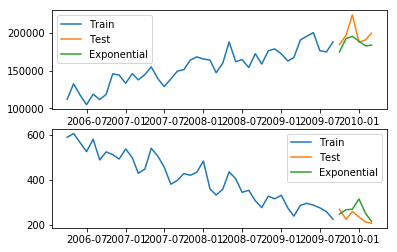

In [65]:
# Exponential Smoothing for SKU types : (High Growth, Trend) 

# This cell would forecast for type Trend

from statsmodels.tsa.holtwinters import ExponentialSmoothing

trend_products, trend_tables = get_sku_of_type("Trend",df)
# print(hg_tables)




for sku in trend_products:
    sku_train,sku_test = get_test_train(trend_tables[sku])
    #print(sku_train)
    #print(sku_test)
    
    model = ExponentialSmoothing(sku_train["SumOfNET_QTY"],seasonal='add',seasonal_periods=12).fit()
    
    pred = model.predict(start=sku_test.index[0], end=sku_test.index[-1])
    
    print(" SKU : ",sku)
    mape = utils.calculate_mape(sku_test["SumOfNET_QTY"],pred)
    print("MAPE: ",mape)
    wmape = utils.calculate_wmape(sku_test["SumOfNET_QTY"],pred)
    print("MAPE: ",wmape)
    
    plt.subplot(len(trend_products),1,list(trend_products).index(sku)+1)
    plt.plot(sku_train.index, sku_train["SumOfNET_QTY"], label='Train')
    plt.plot(sku_test.index, sku_test["SumOfNET_QTY"], label='Test')
    plt.plot(pred.index, pred, label='Exponential')
    plt.legend(loc='best')
    


c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


 SKU :  99000M99503-SIL
MAPE:  0.37961103288761766
MAPE:  0.3792032616080159


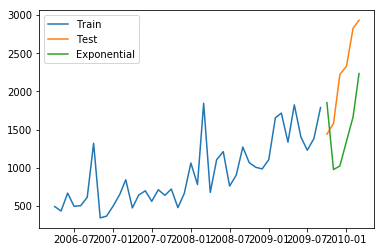

In [66]:
# This cell would forecast for High growth

from statsmodels.tsa.holtwinters import ExponentialSmoothing

growth_products, growth_tables = get_sku_of_type("High growth",df)
# print(hg_tables)


for sku in growth_products:
    sku_train,sku_test = get_test_train(growth_tables[sku])
    #print(sku_train)
    #print(sku_test)
    
    model = ExponentialSmoothing(sku_train["SumOfNET_QTY"],seasonal='mul',seasonal_periods=12).fit()
    
    pred = model.predict(start=sku_test.index[0], end=sku_test.index[-1])
    
    print(" SKU : ",sku)
    mape = utils.calculate_mape(sku_test["SumOfNET_QTY"],pred)
    print("MAPE: ",mape)
    wmape = utils.calculate_wmape(sku_test["SumOfNET_QTY"],pred)
    print("MAPE: ",wmape)
    
    plt.subplot(len(growth_products),1,list(growth_products).index(sku)+1)
    plt.plot(sku_train.index, sku_train["SumOfNET_QTY"], label='Train')
    plt.plot(sku_test.index, sku_test["SumOfNET_QTY"], label='Test')
    plt.plot(pred.index, pred, label='Exponential')
    plt.legend(loc='best')
    
